# Programming Assignment 1 - Understanding upvotes on top reddit posts

After completing this project, you will be able to do the following:

- Collect and save reddit data using the reddit API (through the ```praw``` library)
- Be able to conduct descriptive analyses, via manipulation of data stored in a pandas dataframe, and via the creation and exploration of graphs, of the number of upvotes of reddit comments
- Be able to conduct a linear regression to help understand the factors associated with a top post having many upvotes on reddit
- **574 Only**: Be able to implement additional feature sets and/or a new model and describe why those decisions were made and what their effects were on performance

# Resources you can use to complete this assignment (a COMPLETE list)

**NOTE: You ARE allowed to use Google to find things that fit this list (i.e. it is often easy to google something like "plotly draw line graph" to find the right part of the plotly documentation).**

- Anything linked to in this article
- Anything linked to from the course web page
- Any materials from another online course taught at a university (**if you use this, you MUST provide a link to the exact document used**)
- Anything posted by Kenny, Navid, or Yincheng on Piazza

# Setup

- For this assignment, you will need to install the PRAW library for scraping reddit data.

# Grading

There are three parts to the grading:

1. **Written Report (60 points)**: You will submit a PDF report that provides answers to questions here, and that contains plots we request.  These same questions are also posted in the assignment PDF, for convenience. **Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**.

2. **Saved file from Part 1.3 (10 points)**: See below for details. 

3. **Coding spot checks (30 points)** - We will select 6 problems to spot check. This means that we will check to make sure that your code is written in a reasonable way and that it obtains the desired results when we run your code. For example, your code should not be written in a way that makes it exceedingly slow, e.g. by using for loops where a vectorized approach would be applicable. We will *not* tell you which problems we are spot checking.


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report, answering all questions asked here (and copied in the assignment PDF)
- Your saved file from Part 1.3 below

In [ ]:
!pip install praw

     |████████████████████████████████| 176 kB 23.6 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 


In [ ]:
# This is a comment in the code. All comments in python are preceeded by a pound sign
# Comments can be plain English, because the computer ignores them when running the code.

# This should be all the imports you need for this project.

# The line of code below this comment imports code written by other people in the form of the 
# praw library
import praw

import numpy as np
import pandas as pd
import plotly.express as px


# Part 1: Data collection

## Step 1: Creating a reddit account

If you don't have one already, the first thing you'll need to do is go to [reddit](http://www.reddit.com/) and create a reddit account.

## Step 2: Creating a reddit app

Now, we're going to create a reddit app. Make sure you're signed in to your reddit account, and then go to the [app page](https://ssl.reddit.com/prefs/apps/).  From here, click on the "create an app" button. <b>Make sure that you've selected the "script" option in the checkbox</b>, and then fill in a name and description. For the two URL fields, it doesn't really matter what you put. Your input should look something like mine.

<img width="1000px" src="./reddit_tut_0.png" style="max-width:95%;border:3px solid black;"></img>
    
Cool! Now hit "create app" button.

## Step 3: Scraping some reddit data

### 3a - setting up your API credentials
We're now going to pull down some real, live reddit posts and take a look at them! To do so, we're going to need some information from our app.  Reddit uses this information to keep track of who is accessing their data, and in what ways they're accessing it.  In other words, reddit wants to make sure it knows who might be doing bad things with their data or to their platform, so they can shut those apps down. We'll return to that point in a bit.  But, for now, you'll need to edit the code below to enter in your ```client_id```, your ```client_secret```, and your ```username```  in order for you to be able to collect data.  ***Note - PLEASE TRY TO REMEMBER TO REMOVE YOUR SECRET INFORMATION BEFORE SUBMITTING THE ASSIGNMENT***. You can find the first two on the app creation page, where the red boxes are in the image below:

<img width="1000px" src="reddit_tut_1.png" style="max-width:95%;border:3px solid black;"></img>

Enter your information between the appropriate quotation marks in the (python) code below, replacing the phrase ```ENTER_YOUR_XXX_HERE```.

 ***Make sure to push ```SHIFT+ENTER``` after you've changed the code!*** 

In [ ]:
your_client_id = ''
your_client_secret = ''
your_username = ''  #we erase the secret information 

### 3b - Selecting subreddits

Ok, we're almost all set up to scrape! to do so, we're going to use a python library called [praw](https://praw.readthedocs.io/).  Praw is a relatively powerful tool, allowing you to do a bunch of cool things with the reddit API.  For this assignment, you're just going to do the basics:

Specifically, **<span style="color: red;">create a variable called ```subreddits``` in the code box below. The variable should point to a ```list``` data structure that has the names of 3 subreddits you want to pull data from.</span>**

In [ ]:
subreddits = ['Aespa','STAYC','bangtan']

### 3c - Setting up our authentication mechanism for our application

The last step before we start crawling is to set ourselves up to make authenticated calls to the reddit API. **<span style="color: red;">Use the PRAW library to create an instance of the class ```praw.Reddit``` that you can use to scrape the reddit API.</span>**


In [ ]:
# Code for 3c should go here

reddit = praw.Reddit(
    client_id=your_client_id,
    client_secret=your_client_secret,
    password="ireallyhateml", #my account password
    user_agent="googledrive by u/saeyeonhwang", #application name by u/username
    username=your_username, #username
)

print(reddit.user.me())

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



saeyeonhwang


### 3d - Finally, some scraping!

OK! Now we can finally pull some data down from the reddit API!

<span style="color: red;">Use the ```praw``` library to pull down the **top 1000 posts of all time from EACH of the 3 subreddits you selected.** Note: You may not get all 1000, due to oddities with the reddit API. However, your code should specify that it *wants* up to 1000 posts.</span>

In [ ]:
# Code for 3d should go here

# assume you have a reddit instance bound to variable `reddit`
for i in range(3):
  subreddit = reddit.subreddit(subreddits[i])
  print("subreddit display name:", subreddit.display_name) # Output: redditdev
  print("subreddit title:", subreddit.title)        # Output: reddit development
  print("subreddit description:", subreddit.description)  # Output: a subreddit for discussion of ...
  # assume you have a Subreddit instance bound to variable `subreddit`
  submission_num=0
  for submission in subreddit.top(limit=1000): #pull down the top 1000 posts of all time 
      submission_num+=1
      print("submission number:",submission_num)
      print("submission title:",submission.title) # Output: the submission's title
      print("submission score:",submission.score) # Output: the submission's score
      print("submission id:",submission.id)       # Output: the submission's ID
      print("submission url:",submission.url)     # Output: the URL the submission points to or the submission's URL if it's a self post
      print()
  print(subreddits[i],"submission total num:",submission_num)
  print()


It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



subreddit display name: Aespa
subreddit title: aespa
subreddit description: ##Subreddit Rules

[Read the full, elaborated subreddit rules **here**](https://www.reddit.com//r/aespa/wiki/rules). 

1. Follow [**title guidelines**](https://www.reddit.com/r/aespa/wiki/rules### Rule 3) when submitting. 
2. Please rehost twitter/instagram updates. Video Content should be official links only. 
3. No reposts. 
4. Please make sure gifs or images are of the highest quality available. Edited and/or cropped images will be removed. Gif cropping is allowed, however low quality images/gifs will be removed. NO SCREENCAPS.
5. No self promotion
6. No reaction videos
7. No piracy, including things like "bass-boosted" and "empty hall" edits of songs.
8. Follow [reddiquette](https://www.reddit.com/wiki/reddiquette).


##Communities

###[Instagram](https://www.instagram.com/aespa_official)
###[Youtube](https://www.youtube.com/c/aespa)
###[Weibo](https://weibo.com/aespa)
###[Twitter](https://twitter.com/aespa

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 1
submission title: 220131 Winter 'Step Back' Fanart
submission score: 527
submission id: sh3wkc
submission url: https://i.redd.it/7yd3foi8l1f81.jpg

submission number: 2
submission title: 211123 aespa Out and About in New York City
submission score: 512
submission id: r10ttf
submission url: https://www.reddit.com/gallery/r10ttf

submission number: 3
submission title: 201117 aespa - Black Mamba
submission score: 491
submission id: jvptzj
submission url: https://www.youtube.com/watch?v=ZeerrnuLi5E

submission number: 4
submission title: 211005 aespa - Savage
submission score: 437
submission id: q1shcf
submission url: https://www.youtube.com/watch?v=WPdWvnAAurg

submission number: 5
submission title: This Pic is Everywhere
submission score: 433
submission id: sfybb0
submission url: https://i.redd.it/tglhqo15jqe81.jpg

submission number: 6
submission title: 210517 aespa - Next Level
submission score: 429
submission id: neb4vd
submission url: https://www.youtube.com/watc

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 101
submission title: 211104 aespa Twitter Update with Giselle & Winter
submission score: 252
submission id: qmjpl4
submission url: https://www.reddit.com/gallery/qmjpl4

submission number: 102
submission title: Happy Birthday NingNing 💜
submission score: 252
submission id: qdjagr
submission url: https://i.redd.it/vz4oyw4zr0v71.jpg

submission number: 103
submission title: 211017 aespa earns their fourth win for “Savage” on SBS Inkigayo
submission score: 252
submission id: q9u9gj
submission url: https://i.redd.it/ogzgwyxbuyt71.jpg

submission number: 104
submission title: 210824 Mediheal announces that aespa will become their new endorsement models alongside actor Hyunbin
submission score: 252
submission id: pafsm3
submission url: https://i.redd.it/8b9sgptlb8j71.jpg

submission number: 105
submission title: 210423 SMTOWN Twitter update with aespa
submission score: 252
submission id: mwmsyj
submission url: https://www.reddit.com/gallery/mwmsyj

submission number: 106


It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 201
submission title: 211202 eider.official Instagram Update with Karina
submission score: 209
submission id: r6yln6
submission url: https://i.redd.it/jfi1wgoo22381.jpg

submission number: 202
submission title: 211007 Winter Fan Art - Credits: nagamerin on Twitter and IG
submission score: 208
submission id: qkylng
submission url: https://i.redd.it/xnyuk153s4x71.jpg

submission number: 203
submission title: 210830 aespa x Clio
submission score: 208
submission id: pearib
submission url: https://i.redd.it/adzwyp4f8fk71.jpg

submission number: 204
submission title: 210603 aespa Twitter Update with Taeyeon
submission score: 205
submission id: nqft3f
submission url: https://i.redd.it/6fbh2c1wxs271.jpg

submission number: 205
submission title: From having the lowest rated debut in Melon history to being the first and only most awarded 4th Gen Group in 1 night. A Thread!
submission score: 207
submission id: r98lk1
submission url: https://i.redd.it/wqumayicun381.jpg

submissi

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 301
submission title: appreciation post for Giselle: her interacting with the audience during this performance was pretty cool
submission score: 190
submission id: rjfumn
submission url: https://v.redd.it/5w011f292d681

submission number: 302
submission title: 211026 aespa earns their 7th win for “Savage” on “The Show”!
submission score: 187
submission id: qg3ccw
submission url: https://i.redd.it/9nlkl4dttrv71.jpg

submission number: 303
submission title: 211023 aespa Twitter Update with ae-Ningning ft. Ningning - H.B.D. Ningning 🎂🦋
submission score: 188
submission id: qe4phk
submission url: https://www.reddit.com/gallery/qe4phk

submission number: 304
submission title: 211018 aespa's 'Savage (EP)' debuts at #20 on this week’s Billboard 200. It is their first US entry.
submission score: 186
submission id: qa9dli
submission url: https://twitter.com/billboardcharts/status/1449859580666724355

submission number: 305
submission title: 220126 aespa Twitter Update - Gisell

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 401
submission title: 210405 aespa will make a comeback in May
submission score: 168
submission id: n4dord
submission url: https://entertain.naver.com/read?oid=241&aid=0003113764

submission number: 402
submission title: 210429 aespa Twitter update with Karina
submission score: 171
submission id: n129xs
submission url: https://www.reddit.com/gallery/n129xs

submission number: 403
submission title: 211229 MAMA Twitter update with aespa
submission score: 166
submission id: rr3kwc
submission url: https://www.reddit.com/gallery/rr3kwc

submission number: 404
submission title: 211023 aespa’s “Savage” MV surpasses 100 million views on YouTube 🥳
submission score: 170
submission id: qdzhem
submission url: https://i.redd.it/nkk3gfz4a5v71.jpg

submission number: 405
submission title: 211023 aespa Instagram Story update - Ningning
submission score: 168
submission id: qdywud
submission url: https://www.reddit.com/gallery/qdywud

submission number: 406
submission title: 210813 Yo

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 501
submission title: 201211 aespa VLIVE Update
submission score: 155
submission id: kaxvul
submission url: https://i.redd.it/ce8rw8h3bi461.jpg

submission number: 502
submission title: I hope the members of Aespa get some well-deserved rest soon.
submission score: 149
submission id: s7hw89
submission url: https://www.reddit.com/r/Aespa/comments/s7hw89/i_hope_the_members_of_aespa_get_some_welldeserved/

submission number: 503
submission title: 211005 aespa at Savage media press con
submission score: 153
submission id: q1o1nd
submission url: https://www.reddit.com/gallery/q1o1nd

submission number: 504
submission title: I made Aespa Holographic Pokémon Cards with the new comeback concept. They look soo goood. What do you think?
submission score: 150
submission id: okf27e
submission url: https://www.reddit.com/gallery/okf27e

submission number: 505
submission title: 201116 aespa - Black Mamba (MV Teaser)
submission score: 147
submission id: jun4gy
submission url: https

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 601
submission title: 210911 thepopmag update with Karina
submission score: 134
submission id: plzzgz
submission url: https://i.redd.it/tz0cno87psm71.jpg

submission number: 602
submission title: 210318 aespa Instagram Update with Ningning and Winter
submission score: 134
submission id: m7rgpu
submission url: https://www.reddit.com/gallery/m7rgpu

submission number: 603
submission title: 201219 aespa Twitter update
submission score: 134
submission id: kg6qg7
submission url: https://www.reddit.com/gallery/kg6qg7

submission number: 604
submission title: 211222 aespa x Mediheal Teatree Essential Mask
submission score: 133
submission id: rlviso
submission url: https://v.redd.it/myow4puqg0781

submission number: 605
submission title: 211112 aespa x Eternal Return (Behind Image Teaser Poster)
submission score: 136
submission id: qseedo
submission url: https://i.redd.it/ymi4tua9u6z71.jpg

submission number: 606
submission title: 211104 aespa will participate in SM’s remast

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 701
submission title: 210108 aespa - Black Mamba (MV Behind The Scenes)
submission score: 118
submission id: kszk5j
submission url: https://www.youtube.com/watch?v=IwAvRPWyTw0

submission number: 702
submission title: 201229 - Aespa Twitter update
submission score: 121
submission id: kmgzy0
submission url: https://www.reddit.com/gallery/kmgzy0

submission number: 703
submission title: 220101 aespa Twitter update
submission score: 122
submission id: rsxkk8
submission url: https://www.reddit.com/gallery/rsxkk8

submission number: 704
submission title: 211128 Karina, Winter, and Ningning were tested for COVID-19 after landing because they had cold symptoms
submission score: 118
submission id: r425zf
submission url: https://twitter.com/aespresso_SM/status/1464914173649842177

submission number: 705
submission title: 211014 aespa Twitter Update
submission score: 120
submission id: q7ykhw
submission url: https://www.reddit.com/gallery/q7ykhw

submission number: 706
submiss

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 801
submission title: 220212 aespa will perform for the entrance ceremony for Soonchunhyang University on February 28
submission score: 106
submission id: sqlhx8
submission url: https://v.redd.it/xro117p7pch81

submission number: 802
submission title: Savage album sales update
submission score: 107
submission id: rnajr4
submission url: https://www.reddit.com/r/Aespa/comments/rnajr4/savage_album_sales_update/

submission number: 803
submission title: 211223 Harper's Bazar Korea Instagram update with aespa
submission score: 107
submission id: rmsbux
submission url: https://v.redd.it/dwdqg1kpl9781

submission number: 804
submission title: 210506 aespa to make their comeback May 17th with new single, ‘Next Level’
submission score: 106
submission id: n5tbpg
submission url: https://i.redd.it/oku5yqa0wdx61.jpg

submission number: 805
submission title: 210404 aespa - Black Mamba @ KOREA-UAE K-POP FESTIVAL
submission score: 106
submission id: mk0elx
submission url: https://ww

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 901
submission title: 201208 aespa VLIVE update - after The Show
submission score: 95
submission id: k92rz3
submission url: https://i.redd.it/42ne4xqbay361.png

submission number: 902
submission title: 201205 aespa - MY time, aespa! (First Period Self Introduction: Giselle & Ningning)
submission score: 93
submission id: k74y9w
submission url: https://www.youtube.com/watch?v=ByraneOaLIQ

submission number: 903
submission title: 201201 Karina Instagram update
submission score: 94
submission id: k4kjfz
submission url: https://i.redd.it/5920je0urk261.jpg

submission number: 904
submission title: 220105 aespa Instagram update with Ningning
submission score: 93
submission id: rwo7u4
submission url: https://v.redd.it/k75j8d9jqv981

submission number: 905
submission title: karina with snorlax. chibi version 🥰
submission score: 96
submission id: pj11z9
submission url: https://www.reddit.com/gallery/pj11z9

submission number: 906
submission title: 210708 Karina | "𝐔𝐋𝐓𝐑𝐀 𝟐𝟎𝟎𝟎" 

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 1
submission title: 210906 STAYC - STEREOTYPE (색안경)
submission score: 315
submission id: pivrkg
submission url: https://youtu.be/Xmxcnf2v_gs

submission number: 2
submission title: 210408 STAYC - ASAP
submission score: 280
submission id: mmnqft
submission url: http://youtu.be/NsY-9MCOIAQ

submission number: 3
submission title: 210914 STAYC earns their first ever music show win with "STEREOTYPE" on The Show
submission score: 263
submission id: pnzvee
submission url: https://i.redd.it/uyl6jh6z0gn71.jpg

submission number: 4
submission title: 220221 STAYC - RUN2U
submission score: 246
submission id: sxp1mh
submission url: https://youtu.be/grG41kS4MUA

submission number: 5
submission title: 220211 STAYC - YOUNG-LUV.COM (Concept Teaser Images) — Sieun, Isa, J & Group
submission score: 234
submission id: sp8rtl
submission url: https://www.reddit.com/gallery/sp8rtl

submission number: 6
submission title: 220210 STAYC - YOUNG-LUV.COM (Concept Teaser Images) — Sumin, Seeun & 

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 101
submission title: 220222 STAYC Selected for the Cover of Spotify’s “K-Pop Daebak” Playlist
submission score: 115
submission id: syk76u
submission url: https://i.redd.it/uhz6zayn1dj81.jpg

submission number: 102
submission title: 220212 STAYC Weverse Update - Seeun
submission score: 115
submission id: sqrj8h
submission url: https://www.reddit.com/gallery/sqrj8h

submission number: 103
submission title: 210330 STAYC - STAYDOM (Concept Teaser Images) — J
submission score: 115
submission id: mghz94
submission url: https://www.reddit.com/gallery/mghz94

submission number: 104
submission title: 210330 STAYC - STAYDOM (Concept Teaser Images) — Yoon
submission score: 116
submission id: mfrifu
submission url: https://www.reddit.com/gallery/mfrifu

submission number: 105
submission title: 210329 STAYC - STAYDOM (Concept Teaser Images) — Sumin
submission score: 118
submission id: mf2gr9
submission url: https://www.reddit.com/gallery/mf2gr9

submission number: 106
submission

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 201
submission title: 210819 STAYC - STEREOTYPE (Concept Teaser Images) — Sieun
submission score: 95
submission id: p6szyu
submission url: https://www.reddit.com/gallery/p6szyu

submission number: 202
submission title: 210804 High Up confirms that STAYC is gearing up for a comeback and have completed filming their MV however no schedule has been confirmed
submission score: 94
submission id: oxn1on
submission url: https://entertain.naver.com/read?oid=609&aid=0000475648

submission number: 203
submission title: 210729 STAYC Twitter Update - Seeun & Yoon
submission score: 97
submission id: ottwb3
submission url: https://www.reddit.com/gallery/ottwb3

submission number: 204
submission title: 220110 STAYC Instagram Update
submission score: 93
submission id: s0bl0h
submission url: https://www.reddit.com/gallery/s0bl0h

submission number: 205
submission title: 211126 STAYC Weverse Update - Seeun
submission score: 94
submission id: r2cruh
submission url: https://www.reddit.c

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 301
submission title: 210710 STAYC x Phillips CF (Behind the Scenes Film)
submission score: 87
submission id: ohmesf
submission url: https://v.redd.it/08at5n812fa71

submission number: 302
submission title: 210622 STAYC Twitter Update - Seeun
submission score: 87
submission id: o5d7o9
submission url: https://www.reddit.com/gallery/o5d7o9

submission number: 303
submission title: 210519 STAYC Twitter Update - Seeun
submission score: 89
submission id: nfxd13
submission url: https://www.reddit.com/gallery/nfxd13

submission number: 304
submission title: 211231 STAYC - ASAP + STEREOTYPE @ 2021 MBC Gayo Daejejeon
submission score: 84
submission id: rtp4hn
submission url: https://youtu.be/yhh3c7ytUog

submission number: 305
submission title: 211015 STAYC Weverse Update - J
submission score: 81
submission id: q8dc6i
submission url: https://i.redd.it/r20ns0lamit71.jpg

submission number: 306
submission title: 210712 STAYC Twitter Update
submission score: 81
submission id: oi

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 401
submission title: 210905 STAYC to perform at Mdromeda It's KPOP LIVE on September 6th
submission score: 75
submission id: pi5mvp
submission url: https://i.redd.it/16g55kk7tll71.jpg

submission number: 402
submission title: 210518 STAYC Twitter Update
submission score: 73
submission id: nf1wz8
submission url: https://www.reddit.com/gallery/nf1wz8

submission number: 403
submission title: People are complaining about young-luv.com (STAYC’s latest comeback) and I am not here for it.
submission score: 71
submission id: sxuhwy
submission url: https://www.reddit.com/r/STAYC/comments/sxuhwy/people_are_complaining_about_youngluvcom_staycs/

submission number: 404
submission title: 220125 stationz89.1 Instagram Update ft. Sumin & Yoon
submission score: 74
submission id: sc4dbm
submission url: https://www.reddit.com/gallery/sc4dbm

submission number: 405
submission title: 220109 STAYC Weverse Update - Yoon
submission score: 72
submission id: rzkp5s
submission url: https://

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 501
submission title: 210902 STAYC - STEREOTYPE (Preview #3: Choreography)
submission score: 62
submission id: pfvukz
submission url: http://youtu.be/v5qgQJYsH3w

submission number: 502
submission title: 210629 STAYC TikTok Update - Seeun
submission score: 66
submission id: oa422h
submission url: https://v.redd.it/rwm0r3nas5871

submission number: 503
submission title: 210608 STAYC - Kiss Me More (orig. Doja Cat)
submission score: 61
submission id: nv0tp5
submission url: https://youtu.be/fjcjMQI2kxs

submission number: 504
submission title: Hints at a summer comeback?
submission score: 62
submission id: n5w8g0
submission url: https://www.reddit.com/r/STAYC/comments/n5w8g0/hints_at_a_summer_comeback/

submission number: 505
submission title: STAYC Twitter Update - Birthday Girl Sumin 🎈(210313)
submission score: 63
submission id: m47286
submission url: https://www.reddit.com/gallery/m47286

submission number: 506
submission title: STAYC Twitter Update - Birthday Girl I

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 601
submission title: 220121 Nature Collection x STAYC - 6th Anniversary Congratulatory Message from J
submission score: 53
submission id: s933x2
submission url: https://youtu.be/IY_HlcvcKF4

submission number: 602
submission title: 211218 STAYC Twitter Update - At 2021 KBS Song Festival
submission score: 54
submission id: rijmrn
submission url: https://www.reddit.com/gallery/rijmrn

submission number: 603
submission title: 211203 Sumin - Sumin's Vlog
submission score: 55
submission id: r7wsus
submission url: https://youtu.be/O4yKwQ4s-H0

submission number: 604
submission title: 210816 STAYC Weverse Update - Member Introduction : Sumin
submission score: 51
submission id: p5abb2
submission url: https://v.redd.it/x301qt63wnh71

submission number: 605
submission title: 210727 philips_audio_kr Instagram Update ft. Sumin, Isa & J
submission score: 53
submission id: osl3e4
submission url: https://www.reddit.com/gallery/osl3e4

submission number: 606
submission title: 21070

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 701
submission title: codeglokolor.official Instagram Update ft. Sumin, Isa & Yoon (210304)
submission score: 46
submission id: lxfbi2
submission url: https://i.redd.it/pmk0hq5osyk61.jpg

submission number: 702
submission title: STAYC racer concept??
submission score: 48
submission id: snujgy
submission url: https://www.reddit.com/r/STAYC/comments/snujgy/stayc_racer_concept/

submission number: 703
submission title: 220108 STAYC - SO BAD (Tak Remix) + Dystopian Dance Performance + ASAP @ 36th Golden Disc Awards
submission score: 44
submission id: ryvjzk
submission url: https://youtu.be/am_zC-T8tUg

submission number: 704
submission title: 211216 STAYC to Perform at the 2021 SBS Gayo Daejeon on December 25th
submission score: 44
submission id: rhf842
submission url: https://i.redd.it/sv4uimq17t581.jpg

submission number: 705
submission title: YALL THIS ISNT A DRILL OR A JOKE…. SIEUN REPLIED TO MY COMMENT ON WEVERSE
submission score: 46
submission id: r2gpac
submission

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 801
submission title: 211001 STAYC Twitter Update - Yoon
submission score: 39
submission id: pz2u3x
submission url: https://i.redd.it/cozkx9xzhsq71.jpg

submission number: 802
submission title: 210926 STAYC Weverse Update - Sumin's book recommendation
submission score: 39
submission id: pvsdaw
submission url: https://i.redd.it/soqhnbif6up71.jpg

submission number: 803
submission title: 210918 sbsyoungstreet Instagram Update ft. Sieun, Seeun & J with Red Velvet's Wendy
submission score: 39
submission id: pqn1b8
submission url: https://www.reddit.com/gallery/pqn1b8

submission number: 804
submission title: 210910 STAYC nominated for the Popularity Award at the 2021 TMA Awards
submission score: 37
submission id: plako8
submission url: https://i.redd.it/vum0kv7rpkm71.jpg

submission number: 805
submission title: 210903 STAYC to make their second appearance on The Silence of Idols on September 9th
submission score: 39
submission id: pgxwcy
submission url: https://i.redd.i

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 901
submission title: 210928 myshell.official Instagram Update ft. Isa
submission score: 31
submission id: pwxky1
submission url: https://i.redd.it/1lm40xc3y5q71.jpg

submission number: 902
submission title: 210925 STAYC - STEREOTYPE & ASAP @ The 12th INK Incheon K-POP Concert
submission score: 35
submission id: pvmnkl
submission url: https://www.youtube.com/watch?v=Z1LeXWdXcPU

submission number: 903
submission title: 210917 STAYC - STEREOTYPE (First Win Celebration Live) @ The Show
submission score: 34
submission id: ppx3gk
submission url: https://www.youtube.com/watch?v=lKEjNrUWEMs&ab_channel=TheK-POP

submission number: 904
submission title: 210913 Dingo Global Instagram Update ft. STAYC
submission score: 36
submission id: pnclsm
submission url: https://www.reddit.com/gallery/pnclsm

submission number: 905
submission title: 210911 STAYC - STEREOTYPE @ Music Core
submission score: 32
submission id: pm2na1
submission url: https://youtu.be/eGQG8uWah0g

submission nu

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



subreddit title: Bangtan Boys (BTS)
subreddit description: ###### [Info](https://www.reddit.com/r/bangtan) **[Butter Compilation Gigathread](https://www.reddit.com/r/bangtan/comments/nhj1h8/butter_compilation_gigathread/) [BTS Time Capsule 2021](https://www.reddit.com/r/bangtan/comments/rp29x2/bts_time_capsule_2021/) [r/Bangtan Rolling Moderator Applications](https://forms.gle/ZXZWXVcf31vfHqSp7)**

###### [](/#dropdown)

* *Menu*
 * Main
     * [What is BTS](http://en.wikipedia.org/wiki/Bangtan_Boys)
     * [Rules](http://www.reddit.com/r/bangtan/wiki/rules)
     * [FAQ](http://www.reddit.com/r/bangtan/wiki/faq)
     * [Flairs](https://www.reddit.com/r/bangtan/wiki/flairs)
     * [Wiki](https://www.reddit.com/r/bangtan/wiki/index)
     * [Emojis](https://www.reddit.com/r/bangtan/wiki/emojis)
 * Media
     * [Audio](http://www.reddit.com/r/bangtan/wiki/audio)
     * [Albums](http://www.reddit.com/r/bangtan/wiki/albums)
     * [MV](http://www.reddit.com/r/bangtan/wiki/mv)
     * [Social]

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 1
submission title: Agust D - Daechwita MV
submission score: 3867
submission id: gofu11
submission url: https://www.youtube.com/watch?v=qGjAWJ2zWWI&feature=youtu.be

submission number: 2
submission title: 201124 BTS have been nominated for Best Pop Duo/Group Performance for 'Dynamite' at the 63rd GRAMMY Awards
submission score: 3454
submission id: k09kha
submission url: https://i.redd.it/mf3qx3lg48161.png

submission number: 3
submission title: 200606 Variety: BTS and Big Hit Entertainment Donate $1 Million to Black Lives Matter
submission score: 3246
submission id: gxzurn
submission url: https://variety.com/2020/music/news/bts-big-hit-1-million-black-lives-matter-donation-1234627049/

submission number: 4
submission title: 200821 BTS (방탄소년단) 'Dynamite' Official MV
submission score: 3207
submission id: idnvph
submission url: https://www.youtube.com/watch?v=gdZLi9oWNZg

submission number: 5
submission title: BTS (방탄소년단) 'Butter' Official MV
submission score: 3064
subm

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 101
submission title: I embroidered one of the Love Yourself flowers
submission score: 1610
submission id: cg0o0e
submission url: https://i.redd.it/bmgrw6w3lob31.jpg

submission number: 102
submission title: Jungkook fan art!
submission score: 1604
submission id: c270f8
submission url: https://i.redd.it/30pp9cig76531.png

submission number: 103
submission title: 210707 BTS (방탄소년단) 'Permission to Dance' Official Teaser
submission score: 1594
submission id: oewnn3
submission url: https://youtu.be/iLycuRm1V0Q

submission number: 104
submission title: 200427 IU To Release New Single on the 6th of May Featuring BTS Suga
submission score: 1587
submission id: g8pqn8
submission url: https://n.news.naver.com/entertain/now/article/117/0003356520

submission number: 105
submission title: 200819 j-hope donated 100 million won to the Green Umbrella Children’s Foundation to aid vulnerable children affected by the coronavirus pandemic
submission score: 1584
submission id: ibqec0
su

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 201
submission title: 200608 John Cena: Very happy to join #BTSARMY in efforts to match @BTS_twt tremendous donation #ARMYMatch1M
submission score: 1370
submission id: gz0ix0
submission url: https://twitter.com/JohnCena/status/1270001741673701382

submission number: 202
submission title: Joon Landing
submission score: 1366
submission id: a5vwo7
submission url: https://i.redd.it/7mjyeyi743421.jpg

submission number: 203
submission title: 180425 BTS to perform at the 2018 Billboard Music Awards
submission score: 1368
submission id: 8eklwb
submission url: https://twitter.com/bbmas/status/988779598841352192?s=21

submission number: 204
submission title: Last week, you all seemed to enjoy my RJ cake so much, that I had to share my Tata cake I made the other day!
submission score: 1364
submission id: chnilc
submission url: https://i.redd.it/jaaqmfhh9gc31.jpg

submission number: 205
submission title: I made this RJ cake not too long ago and needed somewhere to share it!
sub

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 301
submission title: Stumbled upon a Jimin birthday event at a cafe today!
submission score: 1216
submission id: dgs6fw
submission url: https://i.redd.it/dxaqwro9h2s31.jpg

submission number: 302
submission title: Hanbok Seokjin (I tried a new style out :))
submission score: 1220
submission id: dfxg50
submission url: https://i.redd.it/z4ckbauklpr31.jpg

submission number: 303
submission title: 190309 Suga of BTS donated 100 million KRW to Korea Pediatric Cancer Foundation on his Birthday
submission score: 1215
submission id: ayxvur
submission url: http://m.newswire.co.kr/newsRead.php?no=884623

submission number: 304
submission title: Crochet doll of Cypher pt 3 Suga
submission score: 1208
submission id: d2xgje
submission url: https://i.redd.it/3je1jgyla1m31.png

submission number: 305
submission title: BTS (방탄소년단) '작은 것들을 위한 시 (Boy With Luv) feat. Halsey' Official MV ('ARMY With Luv' ver.)
submission score: 1208
submission id: bhn9zj
submission url: https://youtu.b

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 401
submission title: 6 years ago today, BTS took home their first ever music show win with "I NEED U" on SBS MTV's 'The Show'
submission score: 1115
submission id: n4x0qa
submission url: https://twitter.com/BTS_twt/status/595567274993459201

submission number: 402
submission title: 200911 BTS have taken their 8th win for "Dynamite" on today's KBS Music Bank
submission score: 1105
submission id: iqn8cy
submission url: https://i.redd.it/wbpqn5zilhm51.png

submission number: 403
submission title: 190831 K-ARMYs plant 1,250 trees in honor of Namjoon's birthday, create 'RM Forest'
submission score: 1108
submission id: cxucrs
submission url: https://twitter.com/HoneyJoonie94/status/1167705878193037312

submission number: 404
submission title: 200803 Black Swan Performance on James Corden hits 50 million views
submission score: 1103
submission id: i2yx8n
submission url: https://www.youtube.com/watch?v=wSNd02kVv8o

submission number: 405
submission title: 200827 'Dynamite' 

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 501
submission title: BTS (방탄소년단) 'Butter (Cooler Remix)' Official MV
submission score: 1026
submission id: nrw281
submission url: https://www.youtube.com/watch?v=ilqQJrbXghQ&feature=youtu.be

submission number: 502
submission title: 201110 [PREVIEW] BTS (방탄소년단) '2021 SEASON’S GREETINGS' SPOT (BTS GOES RETRO)
submission score: 1025
submission id: jqz43z
submission url: https://www.youtube.com/watch?v=yjetoy-RKQ8&feature=youtu.be

submission number: 503
submission title: 200325 LA Times: BTS, Billie Eilish to join James Corden for quarantine edition of ‘Late Late Show’
submission score: 1027
submission id: fotpa4
submission url: https://www.latimes.com/entertainment-arts/tv/story/2020-03-25/coronavirus-james-corden-bts-billie-eilish-late-late-show

submission number: 504
submission title: 201205 “Abyss” by Jin debuts at #1 on Soundcloud’s New & Hot chart across all music genres
submission score: 1026
submission id: k6z2oo
submission url: https://twitter.com/btsanalyti

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 601
submission title: BTS has renewed their contract with Big Hit Entertainment.
submission score: 976
submission id: 9p48bk
submission url: https://twitter.com/doolsetbangtan/status/1052716983161098240?s=21

submission number: 602
submission title: 200830 BTS have taken their second win for "Dynamite" on today's SBS Inkigayo
submission score: 974
submission id: ij94s7
submission url: https://i.redd.it/cz9ozirei3k51.png

submission number: 603
submission title: 200213 Rolling Stone: BTS Will Premiere New Song, Tour NYC on ‘Tonight Show Starring Jimmy Fallon’ on the 24th of February
submission score: 978
submission id: f3aryd
submission url: https://www.rollingstone.com/music/music-news/bts-tonight-show-jimmy-fallon-special-episode-new-york-katzs-deli-952164/

submission number: 604
submission title: 190627 Heize's New Song released on July 7th will be produced by Yoongi.
submission score: 977
submission id: c5xom8
submission url: https://twitter.com/SPOTLIGHTBTS/stat

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 701
submission title: V - Love is nothing stronger
submission score: 924
submission id: d0f2ez
submission url: https://i.redd.it/v7skfsycfyk31.jpg

submission number: 702
submission title: Boy With Luv Enamel Pins!
submission score: 929
submission id: d20i34
submission url: https://i.redd.it/rdonkkkx4ol31.jpg

submission number: 703
submission title: J-Hope - Airplane
submission score: 926
submission id: 82fobj
submission url: https://www.youtube.com/watch?v=8O_MwlZ2dEg&feature=youtu.be

submission number: 704
submission title: Jimin fanart from a while ago :'D
submission score: 928
submission id: asv6v7
submission url: https://i.redd.it/atnx0eq00th21.jpg

submission number: 705
submission title: 210623 BTS won 1st place on Show Champion today with “Butter”, earning the song’s 11th win and a triple crown on the show
submission score: 925
submission id: o69asr
submission url: https://i.redd.it/ziyfdna4hz671.png

submission number: 706
submission title: 210205 Gabriel 

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



submission number: 801
submission title: 180814 BTS' Fake Love has been officially certified gold by RIAA
submission score: 874
submission id: 97a9r6
submission url: https://i.imgur.com/ObBSlA6.jpg

submission number: 802
submission title: BTS's "The Late Show" appearance confirmed to be an interview and performance. Press release promises a historic performance on the Ed Sullivan Theater stage.
submission score: 867
submission id: bkc07p
submission url: https://i.redd.it/c4lpwgc6l1w21.png

submission number: 803
submission title: So I got a BTS tattoo...
submission score: 864
submission id: 8b2zvf
submission url: https://i.redd.it/lev4jlzdvyq01.jpg

submission number: 804
submission title: 190504 Nick Jonas Headed to Rose Bowl Concert
submission score: 866
submission id: bkswb7
submission url: https://v.redd.it/t95o4six1bw21

submission number: 805
submission title: BTS (방탄소년단) - LOVE YOURSELF 結 'Answer' (Tracklist)
submission score: 865
submission id: 98ktb8
submission url: https://t

## Answering some questions about your data and the API

### 1.1 Understanding APIs
***Note, Part 1 questions can be answered by carefully reading the [documentation of the PRAW library carefully](https://praw.readthedocs.io/en/v3.6.2/pages/getting_started.html) and/or the [reddit API documentation](https://github.com/reddit-archive/reddit/wiki/API#rules).***

- **1.1.1** How many API calls were required to collect the submissions? **API can return data up to 25 most recent posts but we could extend this limit to 100 per one playing. so we need 30 API calls to collect the submissions.**

- **1.1.2** Why did we set the submission limit at 1000? **to get top 1000 posts from each of the 3 subreddits**

- **1.1.3** How long, in minutes, would it take you to collect 1000 posts from 25 different subreddits? What about from 500 different subreddits? *Hint: You'll have to consider how many API requests you are allowed to make in a given time period.* **2 seconds are needed to request one API. If we need collecting 1000 posts from 25 different subreddits, we have to call 250 numbers of API. Therefore, we need about 8 and half minutes(500 seconds). Furthermore, we need about 17 minutes(1000seconds) to collect 1000 posts from 500 different subreddits.** 

### 1.2 Thinking about your sample

You collected (approximately) the top 1000 submissions from 3 different subreddits. 

- **1.2.1** Do you think these posts are representative of **all** the posts on that subreddit? (Yes or no, only) **NO**
- **1.2.2** Why or why not? That is, if you think so, why do you think there's not much sampling bias here? If not, what do you think might be different about these top posts than other posts? **The top 1000 posts are just famous posts that are recently posted or viewed many times, and it cannot represent ALL possts**



## Saving out your data

Finally, we're going to save your data out and submit it. For this part, [this section of the API documentation may be useful](https://praw.readthedocs.io/en/latest/getting_started/quick_start.html#determine-available-attributes-of-an-object). Similarly, note that saving CSVs is sometimes easiest by first converting your data into a ```pandas``` dataframe, and then just calling ```.to_csv()```.

<span style="color: red;">You will save the data you have collected out to a CSV file. This CSV file should be called ```part1_data.csv```. The file should contain a column for each of the fields listed in the ```fields_to_capture``` list below. Additionally, you should save out the **author's name** (hint, the author attribute of the ```praw.Submission``` data structure is a ```praw.Redditor``` object. You will need to access that object to get the author name. Call this column ```author_name`` in your CSV file. </span>

**Note: Some posts will not have data for some of these columns. That is fine! You can make these fields blank in the CSV, then.**

In [ ]:
# Don't change this!
fields_to_capture = [ 'created_utc', 
                     'is_crosspostable', 'is_self', 'is_video', 'locked', 'media_only', 'over_18',
                     'subreddit_id', 'subreddit_name_prefixed', 'subreddit_subscribers', 
                     'title', 'permalink', 
                     'total_awards_received', 'downs','gilded','num_comments', 'num_crossposts', 'num_reports', 
                     'ups']

In [ ]:
# Write the code here to save out the data

created_utc=list(); is_crosspostable=list(); is_self=list(); is_video=list(); locked=list();
media_only=list(); over_18=list(); subreddit_id=list(); subreddit_name_prefixed=list(); subreddit_subscribers=list();
title=list(); permalink=list(); total_awards_received=list(); downs=list(); gilded=list(); 
num_comments=list(); num_crossposts=list(); num_reports=list(); ups=list();

redditor = list() #author's name list

for i in range(3):
  subreddit = reddit.subreddit(subreddits[i])
  for submission in subreddit.top(limit=1000): #pull down the top 1000 posts of all time 

    created_utc.append(submission.created_utc) #from fields to capture 
    is_crosspostable.append(submission.is_crosspostable)
    is_self.append(submission.is_self)
    is_video.append(submission.is_video)
    locked.append(submission.locked)
    media_only.append(submission.media_only)
    over_18.append(submission.over_18)
    subreddit_id.append(submission.subreddit_id)
    subreddit_name_prefixed.append(submission.subreddit_name_prefixed)
    subreddit_subscribers.append(submission.subreddit_subscribers)
    title.append(submission.title)
    permalink.append(submission.permalink)
    total_awards_received.append(submission.total_awards_received)
    downs.append(submission.downs)
    gilded.append(submission.gilded)
    num_comments.append(submission.num_comments)
    num_reports.append(submission.num_reports)
    ups.append(submission.ups)

    redditor.append(submission.author) #author list



#Make DataFrame

from pandas import DataFrame

columns=['created_utc',              
        'is_crosspostable', 'is_self', 'is_video', 'locked', 'media_only', 'over_18',
        'subreddit_id', 'subreddit_name_prefixed', 'subreddit_subscribers', 
        'title', 'permalink', 
        'total_awards_received', 'downs','gilded','num_comments', 'num_crossposts', 'num_reports', 
        'ups','author_name']

df = DataFrame([created_utc,is_crosspostable,is_self,is_video,locked,media_only,over_18,subreddit_id,subreddit_name_prefixed,subreddit_subscribers,title,
                permalink,total_awards_received,downs,gilded,num_comments,num_crossposts,num_reports,ups,redditor])
df = df.transpose()
df.columns = columns

print(df)

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

       created_utc is_crosspostable  ...  ups         author_name
0     1643643095.0             True  ...  528            Takagixu
1     1637744214.0             True  ...  512  HugsYouShouldTryIt
2     1605603637.0             True  ...  494            JerSucks
3     1633424411.0             True  ...  435            JerSucks
4     1643509203.0             True  ...  434         Tensai_GenM
...            ...              ...  ...  ...                 ...
2995  1606532534.0             True  ...  799          jaykay1107
2996  1593079506.0             True  ...  795         hyperkid137
2997  1570989735.0             True  ...  793             MeapWiz
2998  1566591136.0             True  ...  797            m-ariame
2999  1547197383.0             True  ...  798         EveningLily

[3000 rows x 20 columns]


In [ ]:
df

,created_utc,is_crosspostable,is_self,is_video,locked,media_only,over_18,subreddit_id,subreddit_name_prefixed,subreddit_subscribers,title,permalink,total_awards_received,downs,gilded,num_comments,num_crossposts,num_reports,ups,author_name
0,1643643095.0,True,False,False,False,False,False,t5_3b3ywg,r/Aespa,10771,220131 Winter 'Step Back' Fanart,/r/Aespa/comments/sh3wkc/220131_winter_step_ba...,6,0,0,12,None,None,528,Takagixu
1,1637744214.0,True,False,False,False,False,False,t5_3b3ywg,r/Aespa,10771,211123 aespa Out and About in New York City,/r/Aespa/comments/r10ttf/211123_aespa_out_and_...,1,0,0,43,None,None,512,HugsYouShouldTryIt
2,1605603637.0,True,False,False,False,False,False,t5_3b3ywg,r/Aespa,10771,201117 aespa - Black Mamba,/r/Aespa/comments/jvptzj/201117_aespa_black_ma...,8,0,0,66,None,None,494,JerSucks
3,1633424411.0,True,False,False,False,False,False,t5_3b3ywg,r/Aespa,10771,211005 aespa - Savage,/r/Aespa/comments/q1shcf/211005_aespa_savage/,2,0,0,48,None,None,435,JerSucks
4,1643509203.0,True,False,False,False,False,False,t5_3b3ywg,r/Aespa,10771,This Pic is Everywhere,/r/Aespa/comments/sfybb0/this_pic_is_everywhere/,3,0,0,17,None,None,434,Tensai_GenM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1606532534.0,True,False,False,False,False,False,t5_2zqih,r/bangtan,339476,201128 Weverse Magazine: RM: “I spend a lot of...,/r/bangtan/comments/k2frfn/201128_weverse_maga...,12,0,1,155,None,None,799,jaykay1107
2996,1593079506.0,True,False,False,False,False,False,t5_2zqih,r/bangtan,339476,200625 SUGA,/r/bangtan/comments/hfjj31/200625_suga/,1,0,1,80,None,None,795,hyperkid137
2997,1570989735.0,True,False,False,False,False,False,t5_2zqih,r/bangtan,339476,Love Yourself Trio Paintings (Acrylic on Canva...,/r/bangtan/comments/dhe0ya/love_yourself_trio_...,0,0,0,11,None,None,793,MeapWiz
2998,1566591136.0,True,False,False,False,False,False,t5_2zqih,r/bangtan,339476,Yoonjin on their fishing trip <3,/r/bangtan/comments/cuj809/yoonjin_on_their_fi...,0,0,0,17,None,None,797,m-ariame


In [ ]:
df.to_csv('part1_data.csv', index = None, na_rep='NaN')

### 1.3 Grading for saving data

Submit your saved data from the reddit API in a file named ```part1_data.csv```. For grading for Part 1.3, we will check that:
- We can read in the saved file using ```pandas.read_csv()```
- The resulting file has data from three subreddits, approximately 1000 from each (give or take what the API decides to give you, which is out of your control).
- The resulting file has all the necessary columns, i.e. those listed in ```fields_to_capture```.


# Part 2 - Analyzing an existing dataset

For this section of the assignment, the entire class will use ```part2_data.csv```.  We will ask you to analyze these data in a variety of ways. Parts of this will be submitted in your written report, and other parts will be evaluated automatically.

**Part 2 data consists of the top 1000 (ish) posts from 24 different subreddits**.

In [ ]:
import pandas as pd
part2_data = pd.read_csv("./part2_data.csv")
part2_data.head()

,created_utc,is_crosspostable,is_self,is_video,locked,media_only,over_18,score,subreddit_id,subreddit_name_prefixed,subreddit_subscribers,title,permalink,total_awards_received,downs,gilded,num_comments,num_crossposts,num_reports,ups,author_name
0,1.582163e+09,False,True,False,False,False,False,146606,t5_2qh72,r/Jokes,22101145,Sad News: The founder of /r/jokes has passed away,/r/Jokes/comments/f6lii3/sad_news_the_founder_...,200,0,5,1699,9,NaN,146606,error521
1,1.511295e+09,False,True,False,False,False,False,137607,t5_2qh72,r/Jokes,22101145,Calm down about the Net Neutrality thing...,/r/Jokes/comments/7ekt23/calm_down_about_the_n...,15,0,2,1614,2,NaN,137607,Victorinox2
2,1.499278e+09,False,True,False,False,False,False,108795,t5_2qh72,r/Jokes,22101145,V,/r/Jokes/comments/6lfqep/v/,29,0,7,1360,1,NaN,108795,MadGo
3,1.565449e+09,False,True,False,False,False,True,105444,t5_2qh72,r/Jokes,22101145,If your surprised that Jeffrey Epstein commite...,/r/Jokes/comments/coj45m/if_your_surprised_tha...,48,0,11,2418,7,NaN,105444,williseeyoutonight
4,1.539007e+09,False,True,False,False,False,False,100954,t5_2qh72,r/Jokes,22101145,A new Navy recruit has his first day on the su...,/r/Jokes/comments/9mf1cz/a_new_navy_recruit_ha...,25,0,9,772,6,NaN,100954,Ckarini


## Part 2.1 - Quick Descriptive Analyses

Answers to each of the questions below should be provided in your written report. Additionally, we expect code to be written below that shows how you obtained answers to each of these questions. We will spot-check several of these. **Note, each of these can be answered using *only pandas*. 


### Univariate descriptive analyses
- **2.1.1** What are the names (```subreddit_name_prefixed```) of the 25 different subreddits that are in ```part2_data.csv```? 
- **2.1.2** How many reddit authors (```author_name```) have a post in more than one unique subreddit in ```part2_data.csv``` (e.g. they have a top post in both ```r/news``` and ```r/hockey```)?
- **2.1.3** What is the mean number of upvotes (```ups```) for posts in ```r/Jokes```?
- **2.1.4** What is the variance of the number of upvotes in ```r/news```?
- **2.1.5** What is the standard deviation of the number of upvotes received across the entire dataset? 
- **2.1.6** (No code for this) Mathematically, what is the relationship between the standard deviation of the number of upvotes and the variance of upvotes?
- **2.1.7** Which subreddit had the third highest median number of upvotes?

### Conditional probability
- **2.1.8** What is the conditional probability of an author having a top post in ```r/news```, given that they have a top post in ```r/worldnews```?


In [ ]:
# Put your code for 2.1.1 here
df = part2_data
sub = df['subreddit_name_prefixed'].unique()
print(sub)

['r/Jokes' 'r/news' 'r/science' 'r/WritingPrompts' 'r/Showerthoughts'
 'r/worldnews' 'r/todayilearned' 'r/learnprogramming' 'r/announcements'
 'r/funny' 'r/food' 'r/sports' 'r/gadgets' 'r/aww' 'r/mildlyinteresting'
 'r/memes' 'r/technology' 'r/travel' 'r/books' 'r/gaming' 'r/cats'
 'r/conspiracy' 'r/PoliticalHumor' 'r/hockey']


In [ ]:
# Put your code for 2.1.2 here
dup = df.groupby(['author_name','subreddit_name_prefixed'])['subreddit_name_prefixed'].count().unstack()
dup = dup.fillna(0)

author_more_than_one = 0 
for i in range(len(dup)):
  true = 0 
  for j in range(24):
    if ~dup.iloc[i].isin([0])[j] == True:
      true+=1
  if true > 1:
    author_more_than_one+=1
print(author_more_than_one)

569


In [ ]:
# Put your code for 2.1.3 here

con = (df.subreddit_name_prefixed == 'r/Jokes') 
jokes_ups = df.loc[con,'ups']
print(jokes_ups.mean())

41057.7813440321


In [ ]:
# Put your code for 2.1.4 here

news_ups = df.loc[(df.subreddit_name_prefixed == 'r/news'),'ups']
print(news_ups.var())

600707867.6203133


In [ ]:
# Put your code for 2.1.5 here

print(df['ups'].std())

43102.4844737104


In [ ]:
# Put your code for 2.1.6 here
print("The standard deviation of the number of upvotes is the square root of the variance of upvotes.")

The standard deviation of the number of upvotes is the square root of the variance of upvotes.


In [ ]:
# Put your code for 2.1.7 here 

def ups_median(name): 
  con = (df.subreddit_name_prefixed == name) 
  median = df.loc[con,'ups'].median()
  return median 

med = list()
for i in range(len(sub)):
  med.append(ups_median(sub[i]))
med = sorted(med, reverse=True)
print(med[2])

109811.0


In [ ]:
# Put your code for 2.1.8 here

#P(worldnews)
worldnews = (df.subreddit_name_prefixed =='r/worldnews')
worldnews = df.loc[worldnews, 'author_name']
unq = worldnews.unique()

#P(news&worldnews)
news = (df.subreddit_name_prefixed == 'r/news')
ins = DataFrame(df.loc[news,'author_name'].isin(unq))
num_ins = 0
for i in range(len(ins)):
  if ins.iloc[i][0] == True:
    num_ins += 1

#P(news|worldnews) = P(news&worldnews)/P(worldnews)
print(num_ins/len(worldnews))


0.2012072434607646


## Part 2.2 - Plotting and the like
Where we have asked you to create a plot below, make sure to provide the resulting plot in your written report.  

**You are free to use whatever plotting software you wish! Although I personally think [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/python), or [altair](https://altair-viz.github.io/) will make these the easiest, the lecture notes also have examples using matplotlib.**


### Part 2.1 - Histograms

Plot a histogram for the distribution of upvotes for each subreddit separately (*hint: you will want to use "faceting" to make this easy on yourself*). **All plot titles and axis labels should be legible in the PDF you submit**.

- **2.2.1** - Submit your histogram image in your assignment
- **2.2.2** - Based on your histogram, which subreddit would you say is the *least* popular? (Note, there is more than one reasonable answer here. We are looking mostly for how you justify your response using the histogram)


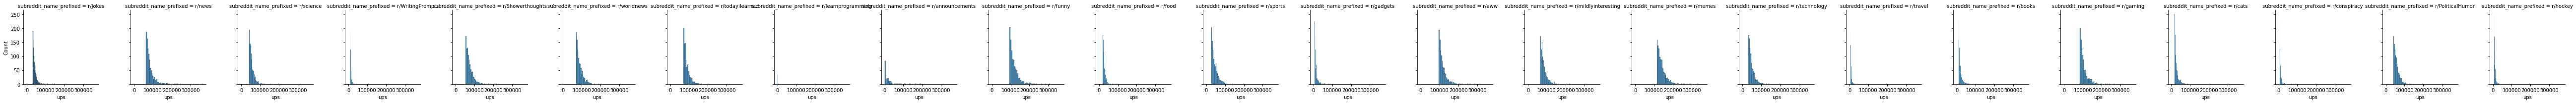

In [ ]:
# Code for 2.2.1 here
import seaborn as sns

figure = sns.FacetGrid(df, col="subreddit_name_prefixed")
figure.map(sns.histplot, "ups")

# 2.2.2 - learnprogramming ups counts were the least.  

### Ploting and using the empirical CDF

The *[empirical cumulative distribution function (eCDF)](https://en.wikipedia.org/wiki/Empirical_distribution_function)* is an empirical estimator for the CDF of a random variable. Below we have plotted for you (using ```plotly```) the eCDFs of the distribution of upvotes for three different subreddits. Using the plots below, answer the following questions:

**Note, you can use your mouse to scroll over the information in the plot, that will make answering these questions much easier!**

- **2.2.3** - **Approximately (within 1-2 percentage points)** what percent of top posts for each of the three subreddits plotted below have less than 100,000 upvotes? (Give answers for each subreddit)
- **2.2.4** - **Approximately (within 1-2 percentage points)** what is the probability that a post on each of the three subreddits plotted below has more than 70,000 upvotes? (Give answers for each subreddit)

In [ ]:
import plotly.express as px

fig = px.ecdf(part2_data[part2_data.subreddit_name_prefixed.isin(["r/news","r/worldnews","r/science"])], 
              x="ups",
              facet_col='subreddit_name_prefixed',
             height=400,width=800)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None)
fig.show()

#2.2.3 84%, 98%, 79%
#2.2.4 71%, 13%, 93% (0.29 0.87 0.07)

### Temporal Trends 

To answer this question we are going to plot the average upvotes and number of top posts of a subreddit in our dataset per each year.

First, add a ```year``` column to the data, that represents the year in which the post was sent. You likely want to use the [pandas documentation on dates and times](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) for this.

In [ ]:
# Add the year column
df['year']=0
import datetime
for i in range(len(df)):
  df['year'][i] = pd.to_datetime(df['created_utc'][i],unit='s').year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


As a check on this column, answer the following question:
- **2.2.5** - How many posts in the dataset were sent in 2010?

In [ ]:
# Code for 2.2.5 here
num=0 
for i in range(len(df)):
  if (df['year'][i]) == 2010:
    num+=1
print('the number of posts in the dataset were sent in 2010: ',num)

the number of posts in the dataset were sent in 2010:  35


Now, we're going to plot the **yearly trend** of average upvotes for each subreddit.

**Hint: We will assume that the average upvotes for a given subreddit in a given year is zero when there are no top posts for that subreddit in that year.** To accurately reflect this, you will have to make sure to account for this case.


In [ ]:
# Hint: you do not have to use this function, but it may be useful for you
from itertools import product
part2_data = df

# create the zeros dataframe
merge_zeros = pd.DataFrame(product(part2_data.year.unique(), 
                     part2_data.subreddit_name_prefixed.unique()),
                     columns =['year','subreddit_name_prefixed']
                )
merge_zeros['ups_with_zeros'] = 0

# merge with the non-zero data ... you write this code ...
nonzero = part2_data.groupby(['year','subreddit_name_prefixed'])['ups'].mean()
nonzero = merge_zeros.join(nonzero, on=['year','subreddit_name_prefixed'], how='left')
merge_zeros['ups_with_zeros'] = nonzero['ups']
merge_zeros = merge_zeros.fillna(0)
merge_zeros

,year,subreddit_name_prefixed,ups_with_zeros
0,2020,r/Jokes,40619.373089
1,2020,r/news,86168.378238
2,2020,r/science,57476.879377
3,2020,r/WritingPrompts,11611.753425
4,2020,r/Showerthoughts,73116.888889
...,...,...,...
331,2009,r/gaming,0.000000
332,2009,r/cats,0.000000
333,2009,r/conspiracy,0.000000
334,2009,r/PoliticalHumor,0.000000


As a check, please do the following:

- **2.2.6** - In your report, provide a table (a screenshot of a pandas dataframe is fine) that shows the average number of upvotes for r/memes each year from 2015 to 2020. The table should be sorted by year (i.e. 2015, then 2016, etc.). Note again, if a year does not have data, there should be zeros in this table!

In [ ]:
# Code for 2.2.6 here
con = (merge_zeros.subreddit_name_prefixed == 'r/memes')  & (merge_zeros.year >= 2015)
memes_ups = merge_zeros.loc[con, ('year','ups_with_zeros')]
memes_ups.sort_values('year',ascending=True)

,year,ups_with_zeros
183,2015,0.000000
111,2016,0.000000
39,2017,0.000000
87,2018,131206.000000
63,2019,135859.126984
15,2020,141141.427305
135,2021,138620.820225
159,2022,127305.750000


- **2.2.7** - Plot a line graph of the temporal trend of mean upvotes from 2016-2020 for the following subreddits: r/Jokes, r/food,r/conspiracy, and r/news . You can plot them individually, or use the faceting approach from above. Write your code for this in the cell below; copy the resulting plot to your PDF report. **Hint: Doing part 2.2.8 will be easiest if you make sure that the plot for each subreddit has its own y-axis!**. 
- **2.2.8** - Using what you have plotted, make an argument for which of the four subreddits is the most "up and coming" - i.e. the one that seems to be getting more popular over time. NOTE: There is more than one reasonable answer here. We are looking for how you justify your answer using the (plotted) data.

'\nThe most "up and coming" subreddit will mean the one which got the highest ups rising rate compared to the recent past.\nFor Jokes, they got 40000 ups in 2019 and 41000 in 2020. It means the recent ups rising rate is about 1.03%(41000/40000).\nFor food, they got about 27000 ups in 2019 and 28000 in 2020. It means the recent ups rising rate is about 1.04%.\nFor conspiracy, they got about 11500 ups in 2019 and 10250 in 2020. It means the recent ups rising rate is about 0.89%.\nFor news, they got about 82000 ups in 2019 and 86000 in 2020. It means the recent ups rising rate is about 1.05%.\nThe highest ups rising rate was r/news\'s, so we could tell r/news is most "up and coming".\n'

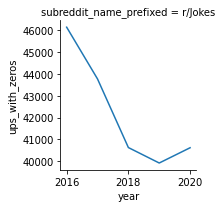

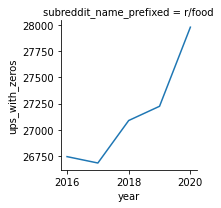

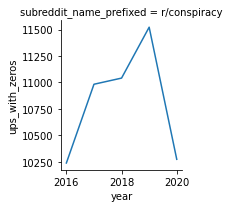

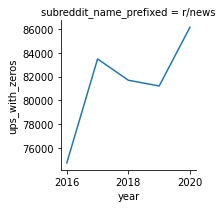

In [ ]:
# Code for 2.2.7 here
import seaborn as sns

def ups(reddit):
  mz = merge_zeros[merge_zeros.subreddit_name_prefixed.isin([reddit])]
  mz = mz[mz.year.isin([2016,2017,2018,2019,2020])]
  mz = mz.sort_values('year',ascending = True)
  fig = sns.FacetGrid(mz, col='subreddit_name_prefixed')
  return fig.map(sns.lineplot,'year','ups_with_zeros')
ups('r/Jokes')
ups('r/food')
ups('r/conspiracy')
ups('r/news')

#2.2.8 
"""
The most "up and coming" subreddit will mean the one which got the highest ups rising rate compared to the recent past.
For Jokes, they got 40000 ups in 2019 and 41000 in 2020. It means the recent ups rising rate is about 1.03%(41000/40000).
For food, they got about 27000 ups in 2019 and 28000 in 2020. It means the recent ups rising rate is about 1.04%.
For conspiracy, they got about 11500 ups in 2019 and 10250 in 2020. It means the recent ups rising rate is about 0.89%.
For news, they got about 82000 ups in 2019 and 86000 in 2020. It means the recent ups rising rate is about 1.05%.
The highest ups rising rate was r/news's, so we could tell r/news is most "up and coming".
"""

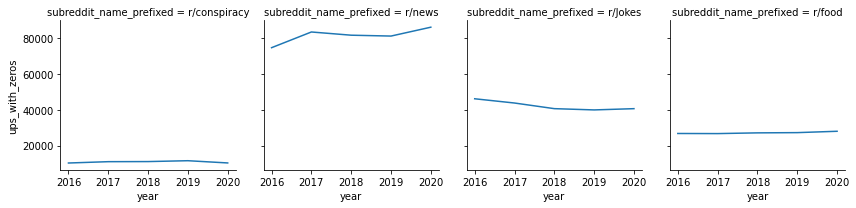

In [ ]:
mz = merge_zeros[merge_zeros.subreddit_name_prefixed.isin(['r/Jokes','r/food','r/conspiracy','r/news'])]
mz = mz[mz.year.isin([2016,2017,2018,2019,2020])]
mz = mz.sort_values('year',ascending = True)
fig = sns.FacetGrid(mz, col='subreddit_name_prefixed')
fig.map(sns.lineplot,'year','ups_with_zeros')

## Part 2.3 - Data Cleaning and some final regression-oriented data exploration

With the above analysis, we've learned some things about what predicts upvotes:
- Which subreddit the post is in is seems to matter quite a bit for the number of upvotes
- Time: there are temporal trends, although separate for each subreddit, that seem to be predictive

As we gear up to create our linear regression model to try to predict the number of upvotes for posts, we are going to turn to two last steps:
1. Data cleaning - we're going to take a look at some bivariate statistics, which are going to reveal some columns in our data that are not useful.  We'll then remove them.
2. Looking at univariate relationships with our outcome - we are going to plot relationships between a few of the remaining interesting continuous variables and our outcome of interest (upvotes)


### Cleaning our data

Below, we list the columns of our dataset...

In [ ]:
part2_data.columns

Index(['created_utc', 'is_crosspostable', 'is_self', 'is_video', 'locked',
       'media_only', 'over_18', 'score', 'subreddit_id',
       'subreddit_name_prefixed', 'subreddit_subscribers', 'title',
       'permalink', 'total_awards_received', 'downs', 'gilded', 'num_comments',
       'num_crossposts', 'num_reports', 'ups', 'author_name', 'year'],
      dtype='object')

Let's start by looking at the continuous variables. Those are:
- ```total_awards_received```
- ```downs```
- ```gilded```
- ```num_comments```
- ```num_crossposts```
- ```num_reports```
- ```created_utc```
- ```subreddit_subscribers```

- **2.3.1**-  There are two continuous variables that are very clearly not going to be useful for our analysis. Identify them, and explain why they are not useful (**note: you do NOT need to know why these variables take on the values they do in our data. You just need to know why we don't want to use them!**) 

Let's now look at our (supposedly) binary categorical variables:
- ```is_crosspostable```
- ```is_self```
- ```media_only```
- ```is_video```
- ```locked```
- ```over_18```

- **2.3.2**-  There are two (supposedly) binary variables that are very clearly not going to be useful for our analysis. Identify them, and explain why they are not useful (**note: you do NOT need to know why these variables take on the values they do in our data. You just need to know why we don't want to use them!**)

Finally, let's look at our remaining variables, which are categorical. One of these, ```title``` (the post's title), is potentially a *very* useful feature... but we haven't yet learned how to use it. So, for now, we're not going to.  The other categorical features are:
- ```subreddit_id```
- ```subreddit_name_prefixed```
- ```permalink```

- **2.3.3** -  Explain why we it is not useful to use *both* ```subreddit_id``` and ```subreddit_name_prefixed``` in any predictive analysis of per-post upvotes.
- **2.3.4** - Explain why it is not useful to use ```permalink``` in any predictive analysis of per-post upvotes.


In [ ]:
#2.3.1 downs, num_reports => 
#2.3.2 is_crosspostable, media_only =>
#2.3.3 subreddit_id and subreddit_name_prefixed features have identical meaning. If we use both features, it means we use duplicated features. 
#2.3.4 permalink feature doesn't have any numerical values, and it is unrelated with per-post upvotes. It only contains the hyperlink of the data, so it would be not helpful in predictive analysis of per-post upvotes.  

## Univariate relationships with the outcome

- **2.3.5** - Plot the relationship between ```num_comments``` and upvotes as a scatterplot with log-scaled axes, with the posts from different subreddits as different color points. Paste this plot into your PDF writeup

- **2.3.6** - Describe, briefly (a sentence) the relationship between ```num_comments``` and upvotes.


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


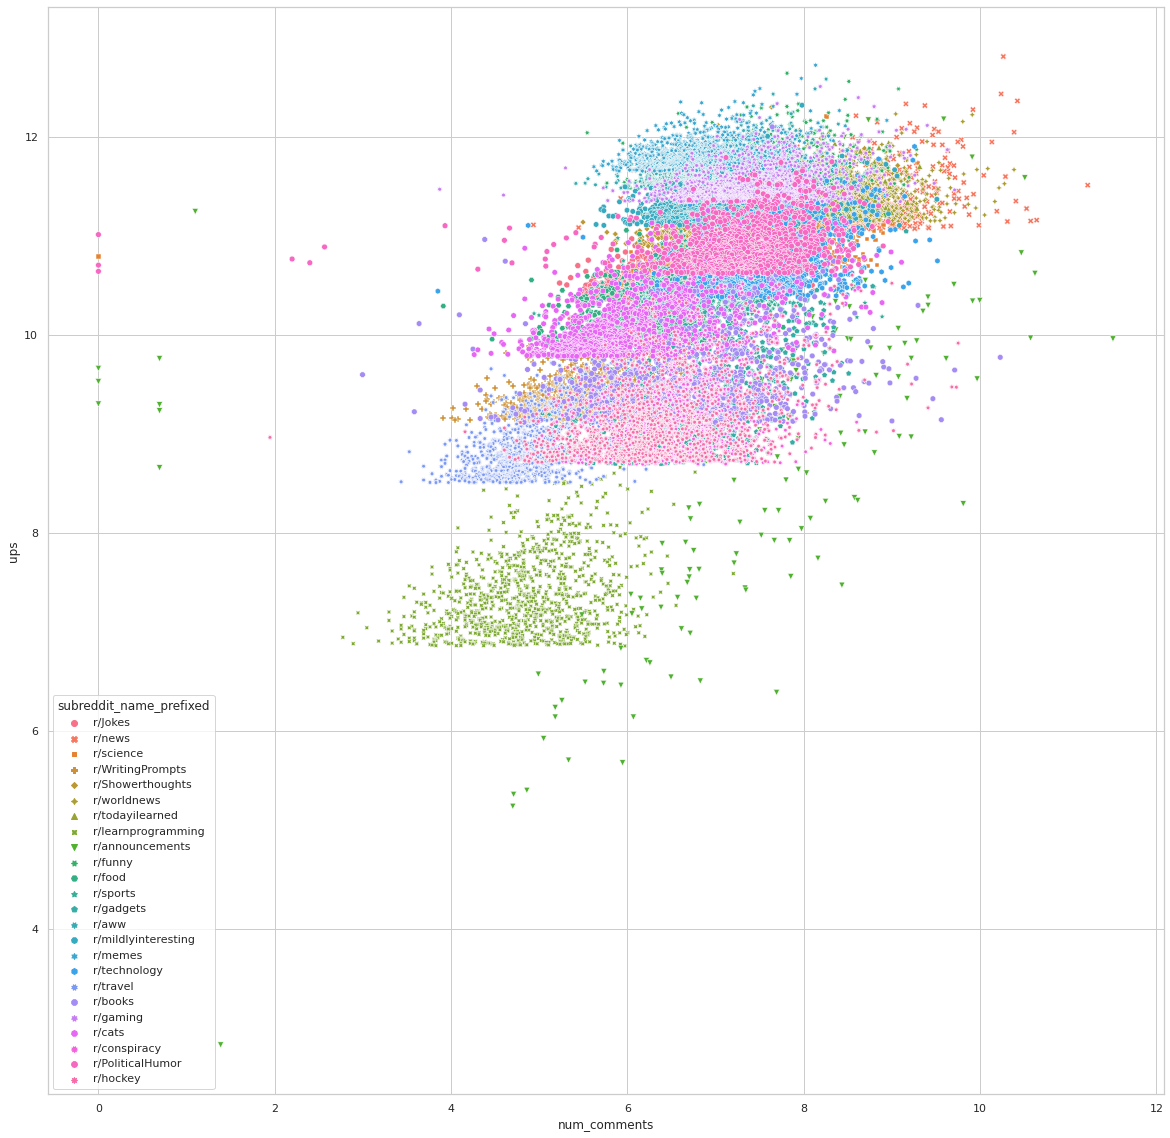

In [ ]:
# Code for 2.3.5 here
part2_data.groupby('subreddit_name_prefixed').size()
x= np.log(part2_data['num_comments'])
y = np.log(part2_data['ups'])
sns.set(rc = {'figure.figsize':(20,20)})
import seaborn as sb
sns.set_style('whitegrid')
sns.scatterplot(x,y,hue='subreddit_name_prefixed',style='subreddit_name_prefixed', data=part2_data)
plt.show()

Compute the [Pearson correlation](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html#pandas.Series.corr) between ```ups``` and all other continuous variables (minus those you identified as not interesting in 2.3.1).

- **2.3.7** - Which of these has the strongest positive correlation with ```ups```?
- **2.3.8** - Which of these has the weakest positive correlation with ```ups```?

In [ ]:
# Code for 2.3.7-8 here
print('total_awards_received: ',part2_data['ups'].corr(part2_data["total_awards_received"], method='pearson', min_periods=None))
print('gilded: ',part2_data['ups'].corr(part2_data["gilded"], method='pearson', min_periods=None))
print('num_comments: ',part2_data['ups'].corr(part2_data["num_comments"], method='pearson', min_periods=None))
print('num_crossposts: ',part2_data['ups'].corr(part2_data["num_crossposts"], method='pearson', min_periods=None))
print('created_utc: ',part2_data['ups'].corr(part2_data["created_utc"], method='pearson', min_periods=None))

total_awards_received:  0.3881542917691692
gilded:  0.22810273946438525
num_comments:  0.3306995383954572
num_crossposts:  0.5379816522109334
created_utc:  0.16547147438976492


# Part 3 - Linear Regression

OK! We've got a decent handle on our data, and we're ready to do some learning. 

We're going to use a linear regression model to predict the number of upvotes.

## Part 3.1 - Regression to predict ```ups```

You will need to write code that does the following:

1. Recreates (if you did not already store it in your dataset) a variable for the year a post was sent in. Now, create a column ```year```, which. Then, subsets your data to only posts from 2015-2021 (inclusive).

2. Creates a feature matrix, ```X```, that contains features for the following variables:
- ```total_awards_received```
- ```gilded```
- ```num_comments```
- ```num_crossposts```
- ```year```
- ```is_self```
- ```is_video```
- ```locked```
- ```over_18```
- ```subreddit_name_prefixed```

3. Creates an outcome variable, ```y```, that is **the logarithm of** ```ups +1```.
4. Splits the data into train and test (80% training, 20% testing) using the relevant ```sklearn``` function. **We have written this line of code for you below, please do not change the random state!**
5. Trains a linear regression model on the training data
6. Evaluates the model you have trained on the test set, using ```RMSE``` as an error metric. **You should calculate this error using ONLY ```pandas``` and/or ```numpy```, not ```sklearn```.**
7. Prints the error

A few useful hints:
- You cannot use ```subreddit_name_prefixed``` as is, you have to transform it somehow. We have suggested a tool to do so below (the ```OneHotEncoder```)
- You also need to transform any boolean variables to 0/1 encodings


In [ ]:
# Lets just reload the data in to make sure we're all starting fresh!
part3_data = pd.read_csv("part2_data.csv")


In [ ]:
## NOTE: Typically we would not rescale a time variable, but it's fine for this assignment.
CONTINUOUS_VARS = ["total_awards_received", "gilded", "num_comments", "num_crossposts","created_utc"]
BINARY_VARS = ["is_self", "is_video", "locked", "over_18"]


for var in BINARY_VARS:
    # Write your code here to make sure the boolean variables are formatted as integers, as is required by sklearn
    for i in range(len(part3_data)):
      part3_data[var][i] = int(part3_data[var][i])

binary_rescaled_X = part3_data[BINARY_VARS].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encode_var(data, varname):
    # This function should take in a variable name in part3_data and return a onehot encoded matrix for that variable


    # Here's a starting point!
    encoder = OneHotEncoder(drop = "first")

    # Use the encoder
    encoder.fit(data[varname].values.reshape(-1,1))
    onehot_encoded_variable = encoder.transform(data[varname].values.reshape(-1,1)).toarray()

    # return the onehot encoded variable
    return onehot_encoded_variable, encoder.categories_

In [ ]:
# OK, now we're going to write our code to run the model!
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# First, rescale the continuous variables
continuous_rescaled_X = StandardScaler().fit_transform(part3_data[CONTINUOUS_VARS].values)

# Now, we can use our function above to get the onehotencoding for the subreddits ... go ahead!
onehot_X = onehot_encode_var(part3_data,"subreddit_name_prefixed")

# Now you can combine all of your features into a single feature matrix. Call it X
X= np.concatenate((continuous_rescaled_X, binary_rescaled_X,onehot_X[0]), axis=1)

# And create your outcome variable, call it y 
y = np.log(part3_data.ups.values+1)

# Don't change this line!
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

# fit a linear regression model, with an intercept
lr = LinearRegression()
lr.fit(X_train, y_train)

# Compute RMSE
y_pred = lr.predict(X_test)
print("RMSE :",np.sqrt(((y_pred - y_test) ** 2).mean()))



RMSE : 0.3783859418482307


### Questions to check understanding

- **3.1.1** - Report your error on the test data, in RMSE. State what this metric means for the expected error in terms of the number of upvotes (not log upvotes!) you should expect to be off on any given prediction

Also, a few questions to target your understanding of how we set up the model:
- **3.1.2** - What did the whole one-hot encoding thing on ```subreddit_name_prefixed``` actually do? 
- **3.1.3** - What does the argument ```drop = "first"``` do for us when we are doing that to ```subreddit_name_prefixed```?
- **3.1.3** - Why did we need to add one to the outcome variable before using ```log```?
- **3.1.4** - What does the ```StandardScaler``` do? Why do we want to do that?


OK. Having looked at our RMSE, we should now realize that we have to be careful about assuming that this one statistic is actually a good estimate of how far we're going to be off on any prediction, selected at random. To see this, let's do the following:
- **3.1.5** - Provide a scatterplot that compares the true values in ```y_test``` to the absolute value of the difference between ```y_test``` and your predictions. **The axes should be on the original scale** (i.e. not the log scale you're predicting on.
- **3.1.6** - What does this plot suggest about how well your model fits the data as the true number of upvotes changes? 


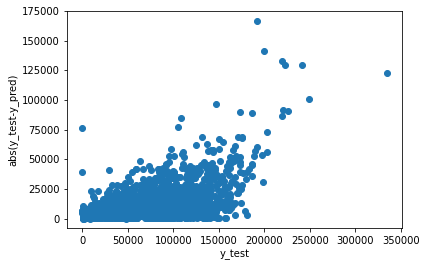

In [ ]:
# Code for 3.1.5 here
import matplotlib.pyplot as plt

X= np.concatenate((continuous_rescaled_X, binary_rescaled_X,onehot_X[0]), axis=1)
y = part3_data.ups.values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.scatter(y_test,abs(y_test-y_pred))
plt.xlabel('y_test')
plt.ylabel('abs(y_test-y_pred)')
plt.show()

One final thing we are going to play with in 3.1. Logging the dependent variable is useful for a few reasons we have or will discuss in class (depending on when you're reading this). But it's also sometimes useful to log *independent* variables as well. Below, redo the same analysis as above, but after logging the non-temporal continuous variables (i.e. all the continuous variables except ```created_utc```). Use these as predictors instead of the original continuous variables. **Note: Perform the logging before you rescale the variables. Also, you should add 1 as we did for the dependent variable above**.

- **3.1.7** - What is the new RMSE with the logged independent variables?
- **3.1.8** - How did this compare to the old RMSE? Why do you think that is? Hint: It may help to re-plot the same figure as you did in 3.1.5, but with the new model, in order to answer this question.


In [ ]:
# Code for 3.1.7 here

# Before rescale it, non-temporal continuous variables
CONTINUOUS_VARS_EXP = ["total_awards_received", "gilded", "num_comments", "num_crossposts"]
log = np.log(part3_data[CONTINUOUS_VARS_EXP].values+1) 

# rescale the continuous variables
continuous_rescaled_X = StandardScaler().fit_transform(log)
created_utc_X = StandardScaler().fit_transform(part3_data['created_utc'].values.reshape(-1,1))

X= np.concatenate((continuous_rescaled_X,created_utc_X, binary_rescaled_X,onehot_X[0]), axis=1)
y = np.log(part3_data.ups.values+1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Compute RMSE
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_test)
print("RMSE :",np.sqrt(((y_pred - y_test) ** 2).mean()))

RMSE : 0.35327319741137153


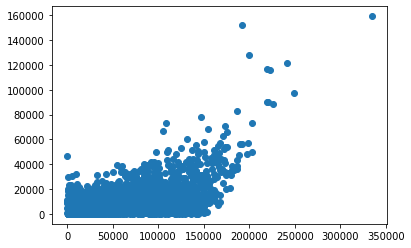

In [ ]:
#extra - code for 3.1.8
X= np.concatenate((continuous_rescaled_X,created_utc_X, binary_rescaled_X,onehot_X[0]), axis=1)
y = part3_data.ups.values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
plt.scatter(y_test,abs(y_test-y_pred))
plt.show()

## Part 3.2 - Exploration of regression coefficients

Now, let's look at the effects of our variables for this last model (with the logarithms of the independent variables). Carefully re-combine your features with their labels (*hint, ```encoder.categories_``` will be your friend, and remember, we dropped the first category!*)

- **3.2.1** - What is the strongest positive predictor of upvotes? How many more log(upvotes+1) does a one standard deviation increase in the feature correspond to?
- **3.2.2** - What is the strongest negative predictor of upvotes? How many fewer log(upvotes+1) does a one standard deviation increase in the feature correspond to?

In [ ]:
# Add your code for 3.2 here
X= np.concatenate((continuous_rescaled_X,created_utc_X,binary_rescaled_X,onehot_X[0],np.array([[1]]+[[0] for _ in range(len(part3_data)-1)])),axis=1)
feature_names=CONTINUOUS_VARS+BINARY_VARS+list(onehot_X[1][0][1:])+[onehot_X[1][0][0]]
dfX = pd.DataFrame(X, columns=feature_names)
dfy = pd.DataFrame(y, columns=["ups"]) 
df = pd.concat([dfy,dfX],axis =1)
df = df.astype(float)   
coefs=df.corr(method='pearson')
coefs

,ups,total_awards_received,gilded,num_comments,num_crossposts,created_utc,is_self,is_video,locked,over_18,r/PoliticalHumor,r/Showerthoughts,r/WritingPrompts,r/announcements,r/aww,r/books,r/cats,r/conspiracy,r/food,r/funny,r/gadgets,r/gaming,r/hockey,r/learnprogramming,r/memes,r/mildlyinteresting,r/news,r/science,r/sports,r/technology,r/todayilearned,r/travel,r/worldnews,r/Jokes
ups,1.000000,0.359562,0.318254,0.653350,0.590754,0.161240,-0.372652,0.126161,0.034331,0.007751,0.088340,0.129433,-0.183489,-0.164410,0.217965,-0.137507,-0.052184,-0.228739,-0.043187,0.219019,-0.197760,0.198440,-0.227592,-0.547933,0.251376,0.158795,0.158376,0.084648,0.034959,0.056384,0.166472,-0.269934,0.167908,0.008140
total_awards_received,0.359562,1.000000,0.371611,0.215300,0.435992,0.695874,-0.156825,0.160256,0.044057,0.006707,0.046202,-0.048469,-0.153640,-0.008249,0.140170,-0.109336,0.209370,-0.074830,-0.072527,0.094876,-0.113941,0.108911,-0.066316,-0.060382,0.332345,0.000435,0.102774,0.004172,-0.135279,-0.019892,-0.045456,-0.156056,0.048434,0.011898
gilded,0.318254,0.371611,1.000000,0.270185,0.333870,0.116670,-0.017478,0.146137,0.038290,0.013592,0.007217,0.024406,-0.100299,0.037443,0.186724,-0.061691,0.037056,-0.055362,-0.084540,0.152568,-0.124853,0.119417,-0.018761,-0.076500,0.068915,-0.022292,0.095481,-0.027558,-0.082505,-0.031234,-0.050705,-0.120452,0.101701,0.018377
num_comments,0.653350,0.215300,0.270185,1.000000,0.393699,0.035973,-0.291574,0.012040,-0.005732,-0.024702,0.086164,0.070348,-0.263962,0.034925,0.031017,-0.023522,-0.144073,-0.061684,-0.129254,0.106929,-0.023806,0.120705,-0.081811,-0.381778,-0.001127,0.062905,0.298722,0.128845,0.029448,0.147832,0.154339,-0.357027,0.293309,0.003428
num_crossposts,0.590754,0.435992,0.333870,0.393699,1.000000,0.418314,-0.365204,0.242557,0.034026,-0.074824,0.054558,-0.059559,-0.188708,-0.050822,0.236325,-0.148372,-0.041300,-0.101615,-0.073748,0.228641,-0.116162,0.135446,-0.191716,-0.209870,0.183229,0.170479,0.117117,0.169570,-0.034682,-0.004264,0.056882,-0.141369,0.115061,0.003875
created_utc,0.161240,0.695874,0.116670,0.035973,0.418314,1.000000,-0.132158,0.087213,0.047820,0.002078,0.105372,-0.036632,-0.086621,-0.238683,0.026269,-0.076957,0.196829,-0.020852,-0.032758,0.005769,-0.006127,0.033163,-0.051645,0.017026,0.155654,0.008268,0.067573,0.031895,-0.128821,-0.010100,-0.003447,-0.059849,0.020036,0.001977
is_self,-0.372652,-0.156825,-0.017478,-0.291574,-0.365204,-0.132158,1.000000,-0.120241,-0.071439,0.163698,-0.109394,0.406069,0.413328,0.118414,-0.109041,0.088813,-0.107582,-0.058555,-0.109394,-0.108990,-0.108817,-0.104252,-0.005967,0.413727,-0.108810,-0.109566,-0.108925,-0.106118,-0.105294,-0.096511,-0.108759,-0.107115,-0.108925,0.012822
is_video,0.126161,0.160256,0.146137,0.012040,0.242557,0.087213,-0.120241,1.000000,-0.013306,-0.020641,-0.048702,-0.048826,-0.049825,-0.019875,0.363198,-0.049695,0.100570,-0.049564,-0.049669,0.182222,-0.049407,-0.049721,0.003113,-0.049747,-0.007109,-0.049747,-0.049695,-0.049616,0.171557,-0.049564,-0.049380,-0.013214,-0.049695,-0.001542
locked,0.034331,0.044057,0.038290,-0.005732,0.034026,0.047820,-0.071439,-0.013306,1.000000,-0.006664,0.234422,-0.032963,-0.038691,0.013916,0.025869,0.075914,-0.007060,-0.036046,0.052834,-0.035981,-0.023670,-0.013041,-0.014418,-0.033762,-0.025136,-0.038630,0.030844,-0.033649,0.004373,0.045766,-0.037120,-0.038691,-0.038589,-0.001197
over_18,0.007751,0.006707,0.013592,-0.024702,-0.074824,0.002078,0.163698,-0.020641,-0.006664,1.000000,-0.023658,0.000480,-0.021791,-0.004777,-0.021751,-0.017831,-0.015949,-0.009950,-0.021710,-0.019663,-0.023533,-0.010064,0.009249,-0.023695,-0.023645,-0.023695,-0.021724,-0.023633,-0.017709,-0.023608,-0.011774,-0.021791,-0.015885,-0.000734


# Part 3.3 - 574 Only - Attempting to Improve Your Predictions 

In class, we talked about a few things we might do to improve our model's predictions. These include adding interaction terms, including different functional forms of a feature, using a different model, etc. Here, we ask that you implement at least two of these, and then re-evaluate your model. We'll ask some of the teams with some of the more interesting/effective ideas here to come present their solutions to the class!

- **3.3.1** - Describe at least two changes you made -- at least one to the feature set, and at least one different model -- to try to improve prediction.  Explain *why* you think that these changes make sense, given the Exploratory analyeses above, or any other exploratory analysis you choose to do.
- **3.3.2** - By how much did your RMSE improve? Which change that you made improved it the most? How do you know?

In [ ]:
# Add your code for 3.3.1 here